_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Hassouna Mohamed Amine (c1)
 - Laforge Mateo (c1)

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [17]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [18]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp1/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example
</div>
<!-- Question End -->

In [19]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


f([[-5.     0.6    4.78   4.24   3.15   0.35 ]
 [-5.     0.565  4.77   3.99   3.15   0.15 ]
 [-2.3    0.565  4.78   5.35   2.76   0.15 ]
 ...
 [-2.3    0.53   4.76   3.68   3.16   0.2  ]
 [-5.     0.6    4.78   4.24   3.15   0.275]
 [-2.3    0.53   5.11   3.69   3.51   0.35 ]]) = [8.620e+00 1.800e-01 2.900e-01 6.200e+00 5.900e-01 1.820e+00 5.587e+01
 4.500e-01 3.450e+00 1.830e+00 3.246e+01 2.460e+00 8.000e-02 1.493e+01
 1.360e+00 3.462e+01 3.900e-01 1.276e+01 1.090e+00 1.310e+00 3.690e+00
 3.275e+01 3.048e+01 1.850e+00 1.100e-01 5.570e+00 2.014e+01 3.738e+01
 2.620e+00 5.190e+00 6.242e+01 7.800e-01 2.063e+01 1.760e+00 1.070e+00
 1.570e+00 5.517e+01 5.410e+00 7.160e+00 1.156e+01 7.500e-01 6.310e+00
 2.230e+00 2.910e+00 2.770e+00 4.900e-01 2.414e+01 2.330e+00 4.700e-01
 1.308e+01 1.430e+00 1.199e+01 2.500e-01 6.400e-01 2.050e+00 8.600e-01
 2.590e+00 6.600e-01 8.000e-02 3.800e-01 2.830e+00 3.564e+01 1.370e+00
 4.600e-01 5.000e-02 2.620e+00 3.700e-01 3.090e+00 6.400e-01 2.730e+00
 1.700e-0

<function matplotlib.pyplot.show(close=None, block=None)>

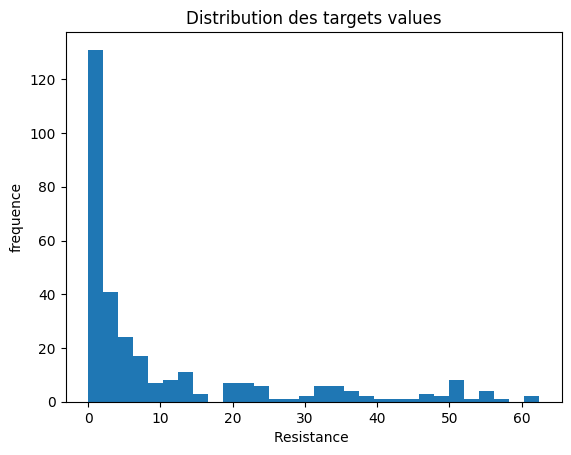

In [20]:
# TODO : explore the dataset
import matplotlib.pyplot as plt

#exploration de tout le datatSet 

for n in dataset:
    print(f"f({X}) = {Y}")
print_stats(dataset)
print("number of examples", X.shape[0])
print("number of features", X.shape[1])

#ground truth of the 10th example 
print("ground truth of the 10th example", Y[9])
    
#visualisation du target juste pour comprendre le contexte mais je comprend pas encore le graph
plt.hist(Y,bins=30)
plt.title("Distribution des targets values")
plt.xlabel("Resistance ")
plt.ylabel("frequence")
plt.show

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

**Number of examples** = 308 
**Number of features** = 6 
**ground truth of the 10th example**=1.83
</div>
<!-- Answer Section End -->

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?
</div>
<!-- Question End -->

In [21]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
we are trying here to insert a column of 1 at the beggining of the inputs matrix x 
np.ones((len(X)) creates 1D array of 1 and axis =1 means that we are inserting it in columns not in rows : 
**why ?:**
this helps us for the dot scalar 

</div>
<!-- Answer Section End -->

## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples
</div>
<!-- Question End -->

In [22]:
# TODO
w = [0]*(X.shape[1])

def h(w, x):
    return np.dot(w, x)

print("first_example h_w(x)",h(w, X[0]))
ground_truth=Y[0]
print("ground truth",Y[0])


first_example h_w(x) 0.0
ground truth 8.62


## Loss function
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.
</div>
<!-- Question End -->

In [23]:
# TODO
def loss(w, x, y):
    return (y - h(w, x))**2

## Empirical loss
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.
</div>
<!-- Question End -->

In [28]:
# TODO
def emp_loss(w, X, Y):
    sum = 0
    for i in range(len(X)):
        sum += loss(w, X[i], Y[i])/len(X)
    return sum

print(emp_loss([1,1], [[0.78, 1.23], [9.213, 7.2]], [3.3, 5.5]))

60.3788345


## Gradient update

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 18 of the perceptron lecture slides for an example)
</div>
<!-- Question End -->

In [25]:
# TODO
def compute_update(w, X, Y, alpha):
    m,n =X.shape
    dw=np.zeros(n)
    for i in range(m):
        error =Y[i]-h(w,X[i])
        dw+=alpha*error*X[i]
    return dw

compute_update(w, X, Y, alpha = 10e-7)

array([ 0.00323257, -0.00756342,  0.00182051,  0.01547611,  0.01269435,
        0.01036508,  0.00130996])

## Gradient descent
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights
</div>
<!-- Question End -->

In [26]:
# TODO
def descent(w_init, X, Y, alpha, max_iter):
    w=w_init.copy()
    for i in range(max_iter):
        dw=compute_update(w,X,Y,alpha)
        w+=dw
    return w

w_init=np.zeros(X.shape[1])
alpha=10e-7
max_iter=1000
print("weights",descent(w_init,X,Y,alpha,max_iter))

weights [ 0.21022896 -0.17194535  0.11470446  0.96699115  0.72762126  0.66113694
  0.44026962]


## Exploitation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?
</div>
<!-- Question End -->

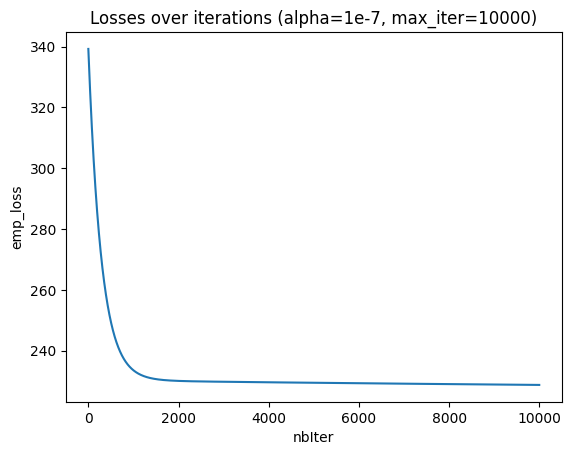

In [27]:
#1st Question  
max_iters = 10000
alpha = 1e-7
def train(max_iter_local, alpha_val):
    w = np.zeros(X.shape[1])
    loss_list = []
    for i in range(max_iter_local):
        lou = emp_loss(w, X, Y)
        loss_list.append(lou)
        w = descent(w, X, Y, alpha_val, 1)

    return w, loss_list

w_final, losses = train(10000, alpha)

plt.plot(losses)
plt.xlabel("nbIter")
plt.ylabel("emp_loss")
plt.title("Losses over iterations (alpha=1e-7, max_iter=10000)")
plt.show()


alpha=0.0001, Final loss after 100000 iterations: 78.4522
alpha=1e-05, Final loss after 100000 iterations: 79.1724
alpha=1e-06, Final loss after 100000 iterations: 158.7858


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


alpha=1e-07, Final loss after 100000 iterations: 220.0369


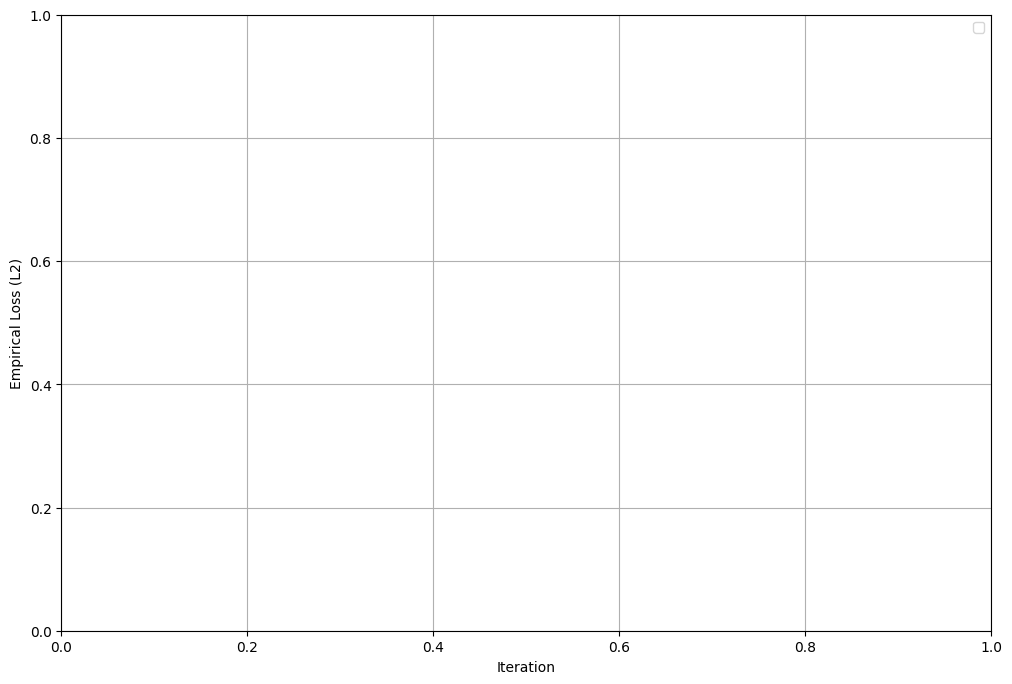

In [59]:

def loss_evolution(w_init, X, Y, max_iteration, num_iterations):
    loss_history = []
    w = w_init.copy()
    
    for i in range(num_iterations):
        current_loss = emp_loss(w, X, Y)
        loss_history.append(current_loss)
        w = descent(w, X, Y, max_iteration,1)
    
    print(f"alpha={max_iteration}, Final loss after {num_iterations} iterations: {loss_history[-1]:.4f}")
    
    return w,loss_history

alphas = [1e-4, 1e-5, 1e-6, 1e-7]
num_iterations = 100000
all_losses = {}


plt.figure(figsize=(12, 8))

for alpha_val in alphas:
    w_init = np.zeros(X.shape[1])
    w_final, losses = loss_evolution(w_init, X, Y, alpha_val, num_iterations)
    all_losses[alpha_val] = losses

plt.xlabel('Iteration')
plt.ylabel('Empirical Loss (L2)')
plt.legend()
plt.grid(True)
plt.show()


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**


1) yes it converged to 220 
2) for different values alpha 10e (-7 to -3): 
\
Best configuration: alpha=1e-04, iter=10000 with final loss =79.1724 and for iter=100000 with final loss =78.4522
so that the number of iteration here just change a bit but what does it really count is the alpha
    

NB : le temps d'éxécution de cette cellulle est envions 8 min 

if we maximize the alpha value we get the best result of emperical loss 



</div>
<!-- Answer Section End -->

Text(0, 0.5, 'f(examples)')

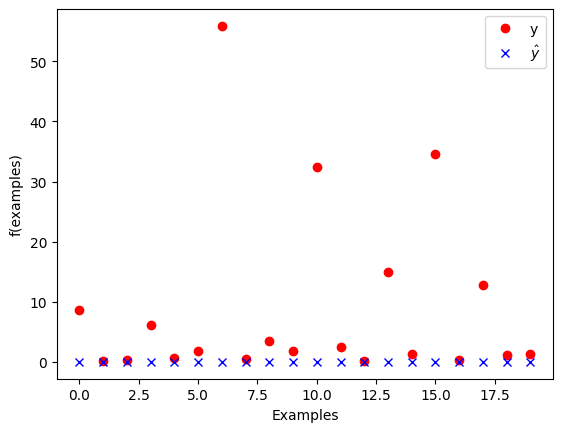

In [ ]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction

num_samples_to_plot = 20
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")






# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?
</div>
<!-- Question End -->


### Improvements to gradient descent

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations
</div>
<!-- Question End -->


<!-- Answer Section Start -->

<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

### Our implementation : 

1. We first apply standard normalization to all input features, keeping a bias column equal to 1.
2. We initialize the perceptron's weights to zeros and perform gradient descent with and without normalization.
3. During training, we record the empirical loss at each iteration for both normalized and original data.
4. Finally, we plot and compare the loss curves to evaluate convergence speed and accuracy improvement.


</div>
<!-- Answer Section end -->


In [43]:
#TODO 
#DATA Normalisation
from sklearn.preprocessing import StandardScaler

X_features_only = X[:, 1:]
sc = StandardScaler(copy=True)
X_normalized_features = sc.fit_transform(X_features_only)

X_normalized = np.concatenate([X[:, [0]], X_normalized_features], axis=1)



In [54]:

def descent_with_early_stop(w_init, X, Y, alpha, max_iter, tol=1e-6):
    w = w_init.copy()
    prev_loss = emp_loss(w, X, Y)
    for i in range(max_iter):
        dw = compute_update(w, X, Y, alpha)
        w = w + dw
        current_loss = emp_loss(w, X, Y)
        if abs(prev_loss - current_loss) < tol:
            break
        prev_loss = current_loss
    return w


Final loss (baseline): 79.17212422317364
Final loss (normalized): 78.45038152894753


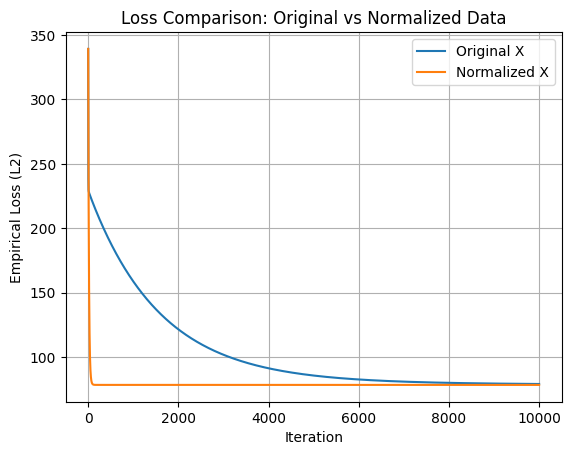

In [57]:
# tests and plots 
import matplotlib.pyplot as plt

#without normilization 

# Test 1: Original Data (no normalization)
w_init = np.zeros(X.shape[1])
alpha = 1e-4
max_iter = 10000

losss_history_original = []
w = w_init.copy()

for i in range(max_iter):
    loss_2 = emp_loss(w, X, Y)
    losss_history_original.append(loss_2)
    w = descent(w, X, Y,alpha,1)


print("Final loss (baseline):", emp_loss(w, X, Y))


# Test 2: Normalized Data
w_init_norm = np.zeros(X_normalized.shape[1])
loss_history_norm = []
w_norm = w_init_norm.copy()

for i in range(max_iter):
    loss_3 = emp_loss(w_norm, X_normalized, Y)
    loss_history_norm.append(loss_3)
    w_norm = descent_with_early_stop(w_norm, X_normalized, Y,alpha,1)


print("Final loss (normalized):", emp_loss(w_norm, X_normalized, Y))

#Comparation between normilized and non normilized 

plt.plot(losss_history_original, label="Original X")
plt.plot(loss_history_norm, label="Normalized X")
plt.xlabel("Iteration")
plt.ylabel("Empirical Loss (L2)")
plt.title("Loss Comparison: Original vs Normalized Data")
plt.legend()
plt.grid(True)
plt.show()


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here: Normilized Data**

### Data normalization: Is the convergence faster? How to quantify speed-up? What about accuracy?

From the plot, we can clearly observe that applying standard normalization to the input features significantly improved the convergence speed. The orange curve (Normalized X) reaches a low empirical loss much faster than the blue curve (Original X). 

Specifically, the normalized data achieved a stable low loss around 100 within the first few hundred iterations, while the original data took almost 10,000 iterations to approach a similar loss value.

Quantitatively, the normalized data reduced the loss by more than half within the first 500 iterations, whereas the original data required nearly 10,000 iterations to reach the same level of loss. This represents a speed-up factor of approximately 20x in reaching the same accuracy.

In terms of accuracy, both models converge to similar final loss values. However, normalization allowed the model to reach this level of performance much earlier during training.

- **Convergence was faster** with normalized data.
- **Speed-up was significant**: normalized data reached the target loss about 20 times faster.
- **Accuracy was similar** for both normalized and original data.
- **both of them generates the same final loss** ~79 



</div>
<!-- Answer Section End -->